In [ ]:
라이브러리 임포트

In [4]:
import numpy as np
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray

from scipy import signal, ndimage
import matplotlib.pylab as pylab

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arctan
  # Remove the CWD from sys.path while we load stuff.


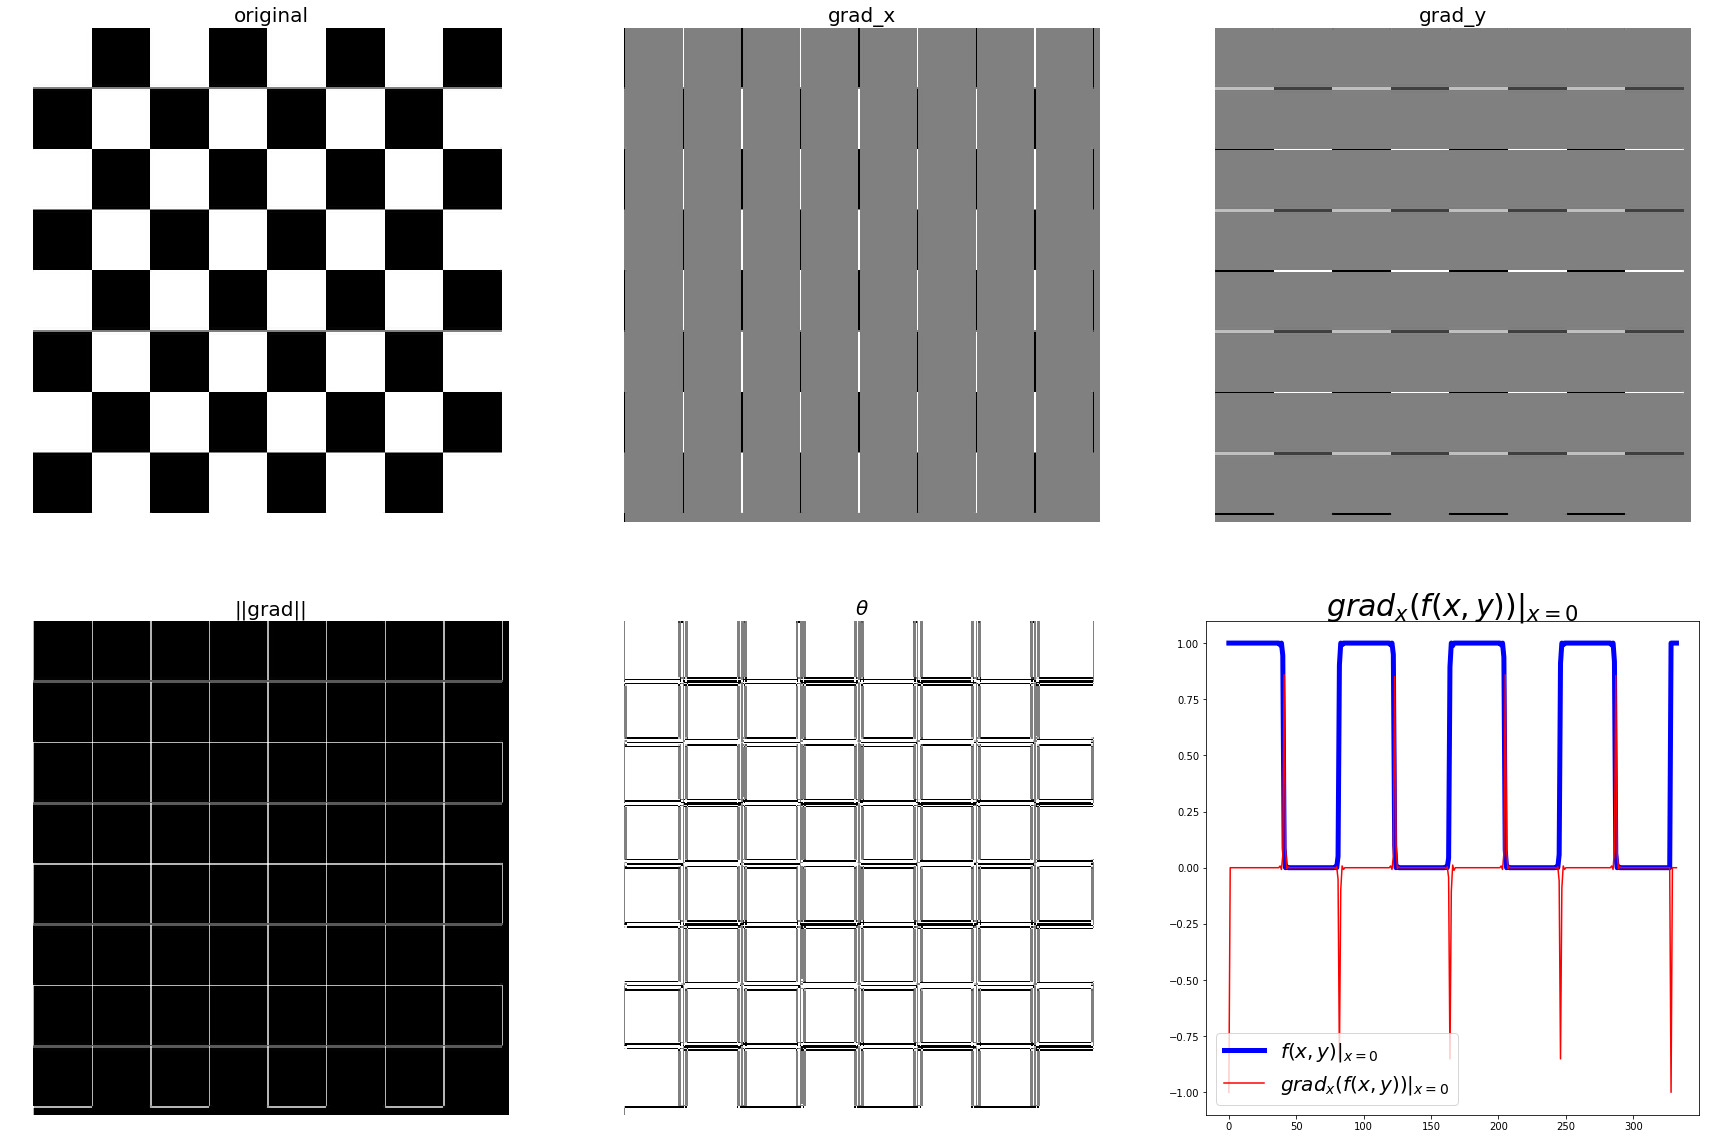

In [5]:
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')
    
ker_x = [[-1, 1]] # 1행, 2열
ker_y = [[-1], [1]] # 2행, 1열
im = rgb2gray(imread('../images/chess.png'))
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)

pylab.figure(figsize=(30,20)), pylab.gray()
pylab.subplot(231), plot_image(im, 'original')
pylab.subplot(232), plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y')
pylab.subplot(234), plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_ang, r'$\theta$')
pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', \
           linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label= \
           r'$grad_x(f(x,y))|_{x=0}$')

pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})
pylab.show()

In [ ]:
동일 영상에 크기 및 그레디언트 표시

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arctan
  
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sin
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in cos


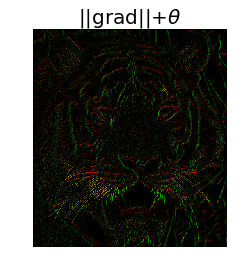

In [6]:
im = rgb2gray(imread('../images/tiger3.jpg'))

im_x = np.clip(signal.convolve2d(im, ker_x, mode='same'),0,1)      # 0~1 사이 값으로 클램핑
im_y = np.clip(signal.convolve2d(im, ker_y, mode='same'),0,1)
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)

# pylab.figure(figsize=(30,20)), pylab.gray()
# pylab.subplot(231), plot_image(im, 'original')
# pylab.subplot(232), plot_image(im_x, 'grad_x')
# pylab.subplot(233), plot_image(im_y, 'grad_y')
# pylab.subplot(234), plot_image(im_mag, '||grad||')
# pylab.subplot(235), plot_image(im_ang, r'$\theta$')
# pylab.subplot(236)

im = np.zeros((im.shape[0],im.shape[1],3))
im[...,0] = im_mag*np.sin(im_ang)
im[...,1] = im_mag*np.cos(im_ang)
plot_image(im, r'||grad||+$\theta$')

In [ ]:
라플라시안 계산

<Figure size 432x288 with 0 Axes>

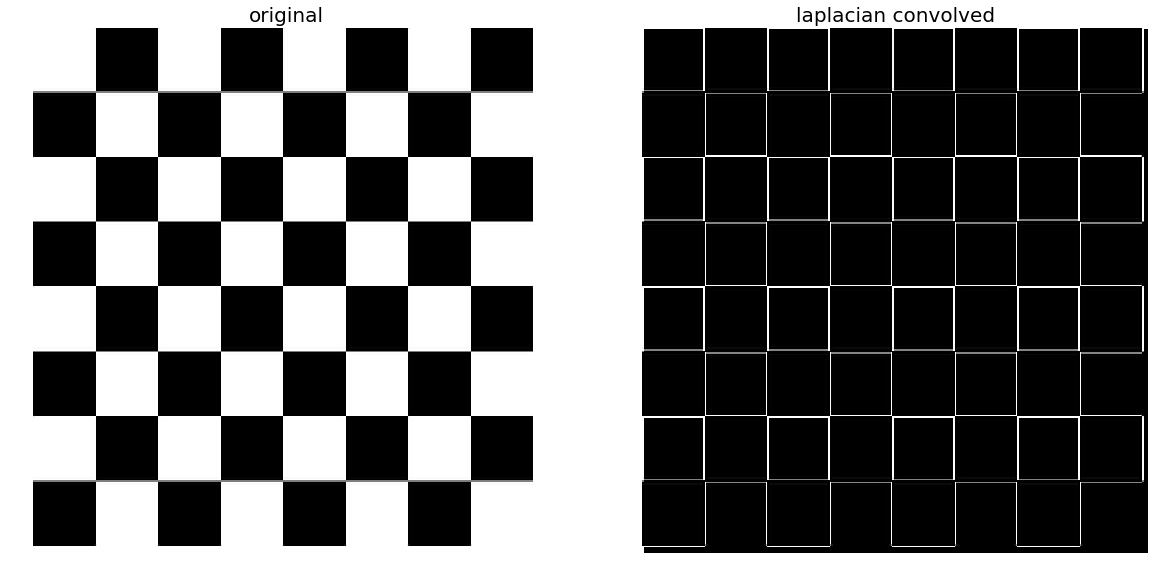

In [8]:
ker_laplacian = [[0, -1, 0],
                 [-1, 4, -1],
                 [0,-1, 0]]
im = rgb2gray(imread('../images/chess.png'))
im1 = np.clip(signal.convolve2d(im, ker_laplacian, mode='same'),0,1)

pylab.gray() # 명암도 영상으로 표시
pylab.figure(figsize=(20,10))
pylab.subplot(121), plot_image(im, 'original')
pylab.subplot(122), plot_image(im1, 'laplacian convolved')
pylab.show()

In [ ]:
그레디언트 계산에서 잡음의 영향

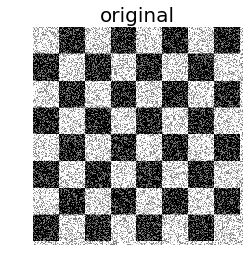

In [9]:
from skimage.util import random_noise

sigma = 1 # 잡음 생성을 위한 표준 편차
im = im + random_noise(im, var=sigma**2)
plot_image(im, 'original')

In [ ]:
라플라시안을 사용한 샤프닝

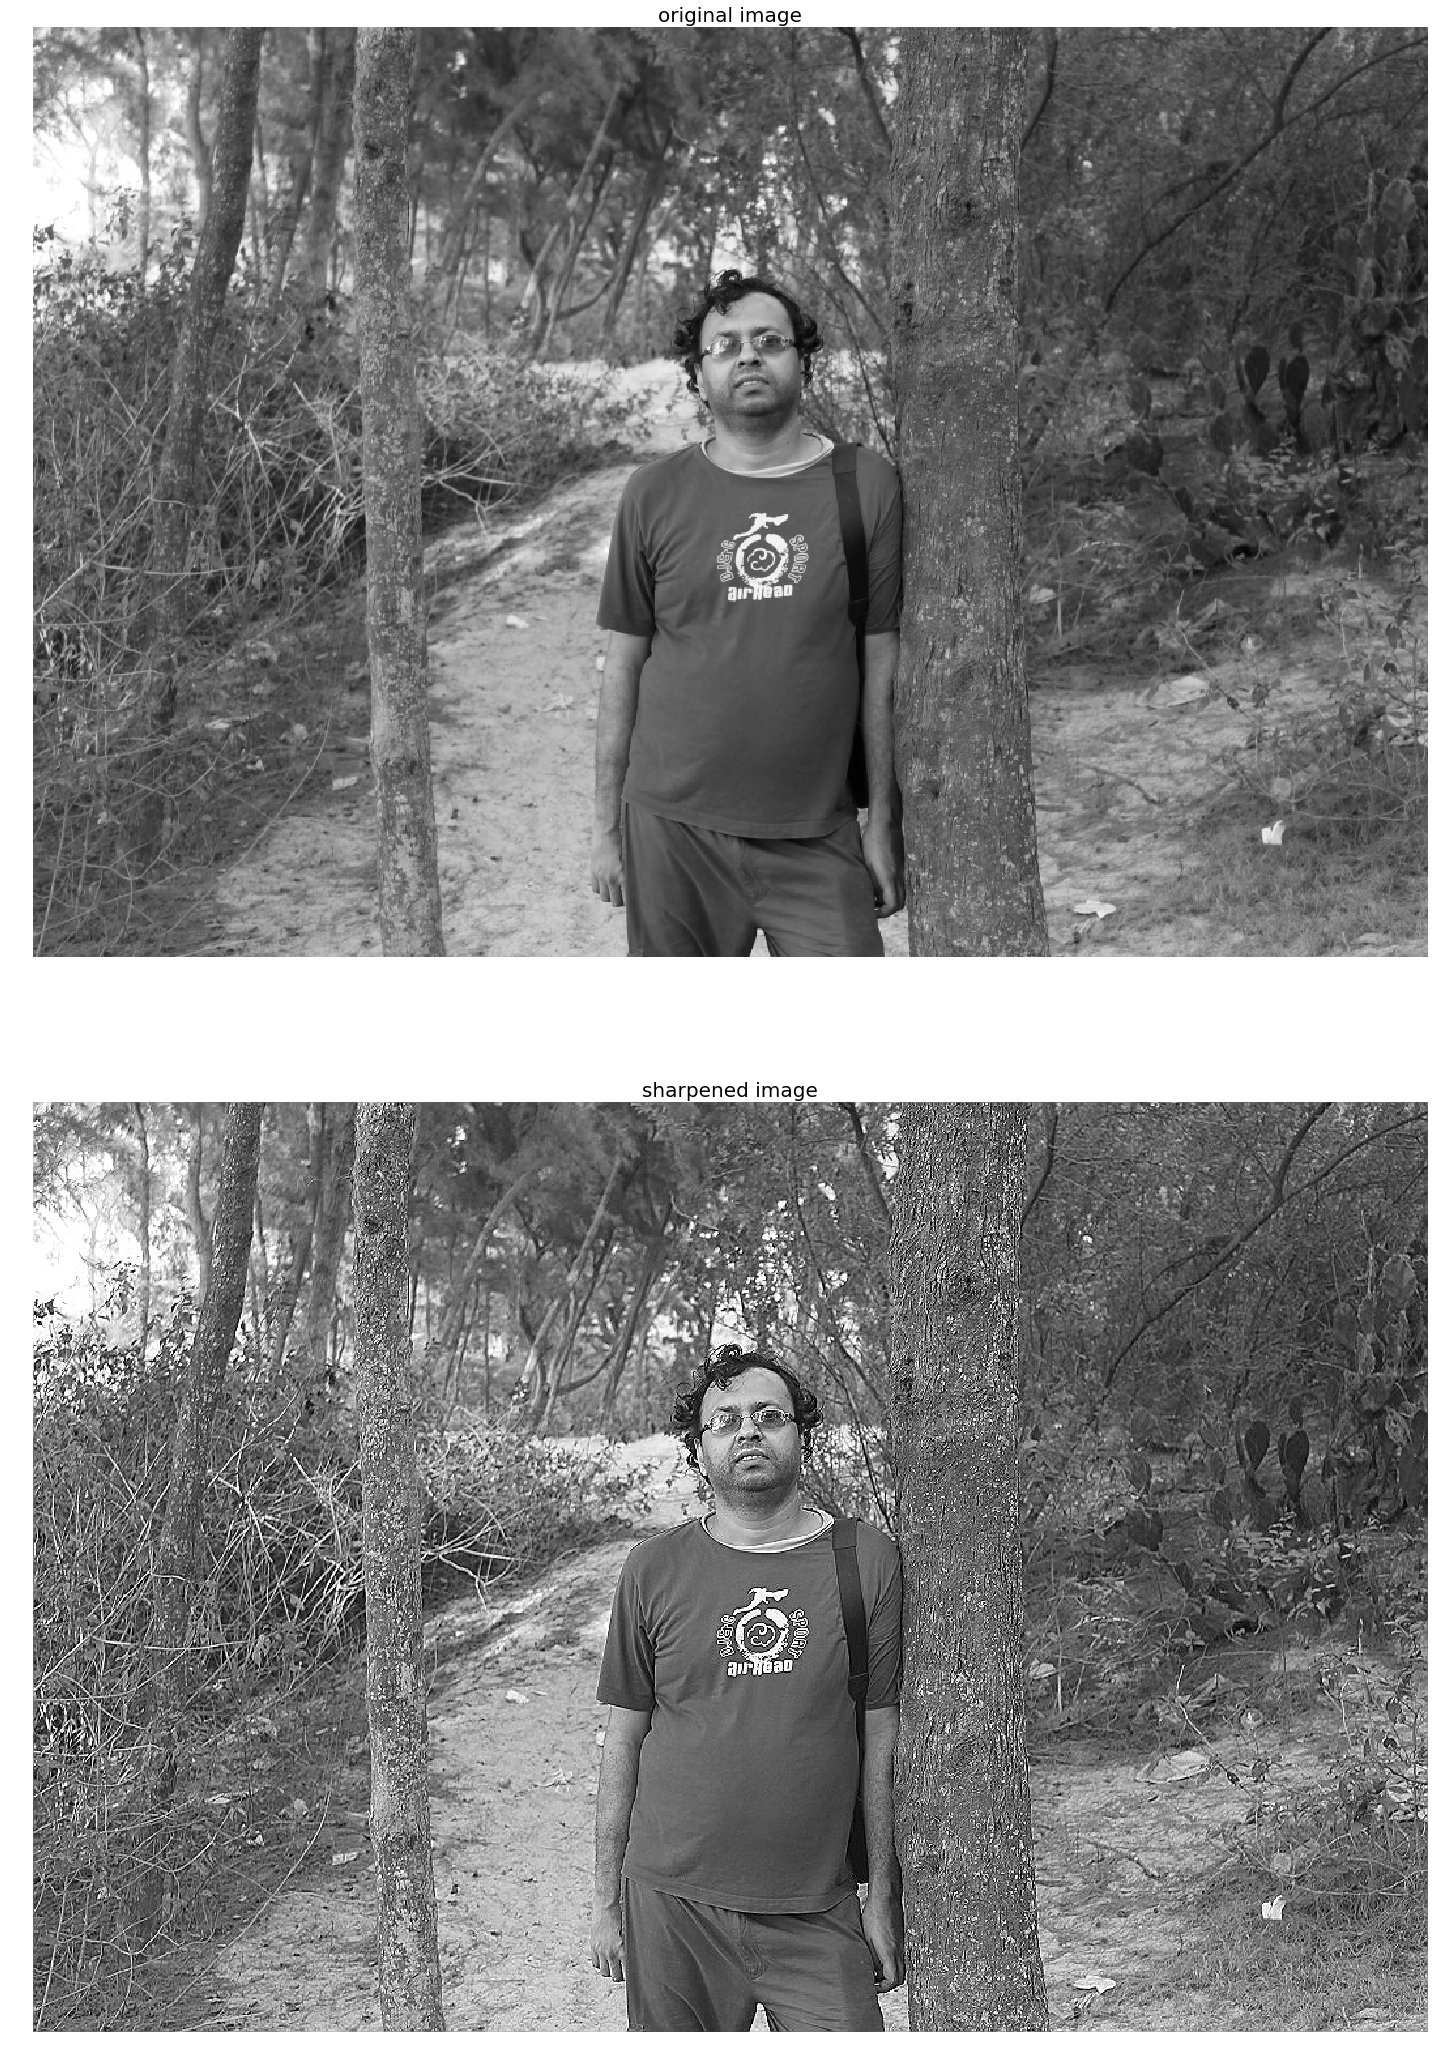

In [10]:
from skimage.filters import laplace
im = rgb2gray(imread('../images/me8.jpg'))
im1 = np.clip(laplace(im) + im, 0, 1)
pylab.figure(figsize=(20,30))

pylab.subplot(211), plot_image(im, 'original image')
pylab.subplot(212), plot_image(im1, 'sharpened image')
pylab.tight_layout()
pylab.show()

In [ ]:
언샤프 마스킹 - SciPy ndimage 모듈 사용

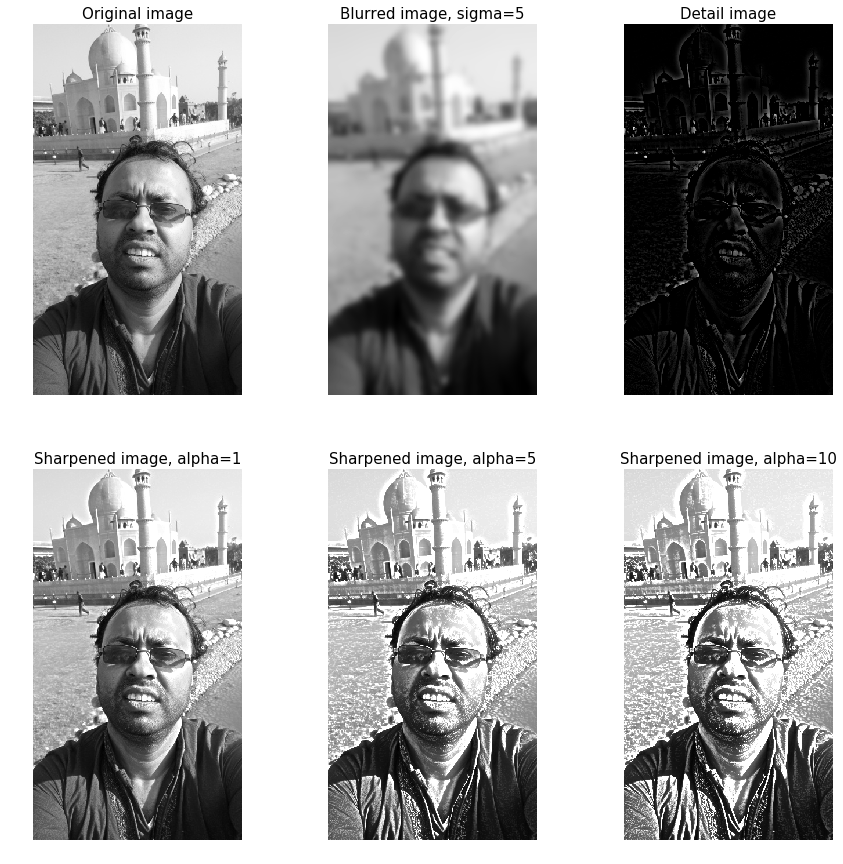

In [11]:
def rgb2gray2(im): 										# 사용자 정의 명암도 영상 변환 함수
    ''' 입력 영상은 0~1 사이 값을 갖는 RGB 영상'''
    gray = 0.2989 * im[...,0] + 0.587 * im[...,1] + 0.114 * im[...,2]
    return np.clip(gray, 0, 1) 							# 0~1 사이값으로 클램핑

im = rgb2gray2(imread('../images/me4.jpg')/255)			# 화소 값 정규화 후 명암도 변환
im_blurred = ndimage.gaussian_filter(im, 5)
im_detail = np.clip(im - im_blurred, 0, 1)

fig, axes = pylab.subplots(2, 3, figsize=(15, 15))
axes = axes.ravel()
axes[0].set_title('Original image', size=15), axes[0].imshow(im)
axes[1].set_title('Blurred image, sigma=5', size=15), axes[1].imshow(im_blurred)
axes[2].set_title('Detail image', size=15), axes[2].imshow(im_detail)

for i, alpha in enumerate([1, 5, 10]):
    im_sharp = np.clip(im + alpha*im_detail, 0, 1)
    axes[i+3].imshow(im_sharp)
    axes[i+3].set_title('Sharpened image, alpha=' + str(alpha), size=15)
    
for ax in axes: ax.axis('off')
pylab.show()

In [ ]:
소벨 연산자 사용

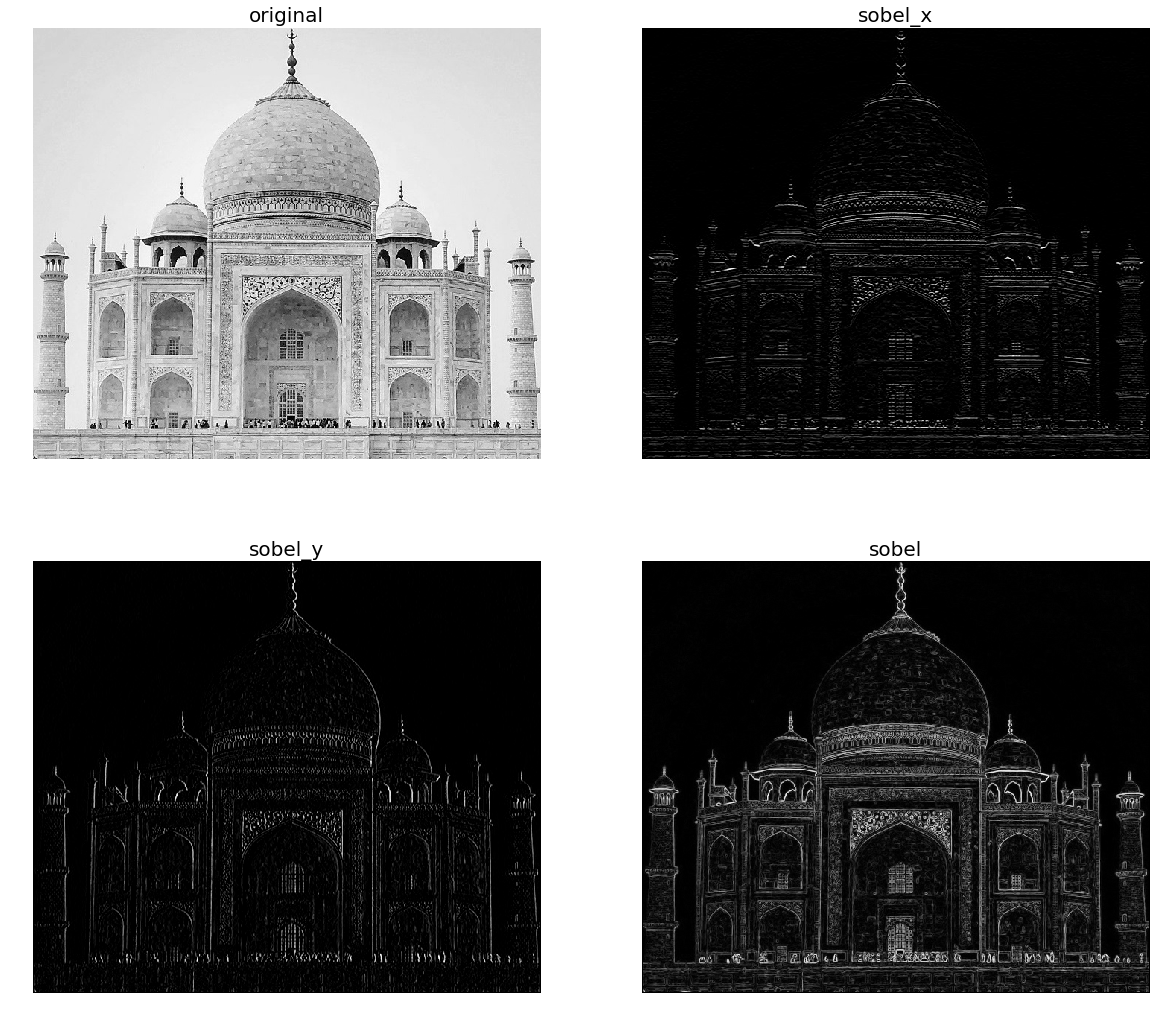

In [12]:
im = rgb2gray(imread('../images/tajmahal1.jpg')) # RGB 영상--> 명암도 영상
edges_x = np.clip(filters.sobel_h(im), 0,1)
edges_y = np.clip(filters.sobel_v(im), 0,1)
edges = filters.sobel(im)

pylab.figure(figsize=(20,18)), pylab.gray()
pylab.subplot(2,2,1), plot_image(im, 'original')
pylab.subplot(2,2,2), plot_image(edges_x, 'sobel_x')
pylab.subplot(2,2,3), plot_image(edges_y, 'sobel_y')
pylab.subplot(2,2,4), plot_image(edges, 'sobel')
pylab.show()

In [ ]:
에지 검출기 필터들 적용- 그레디언트 크기

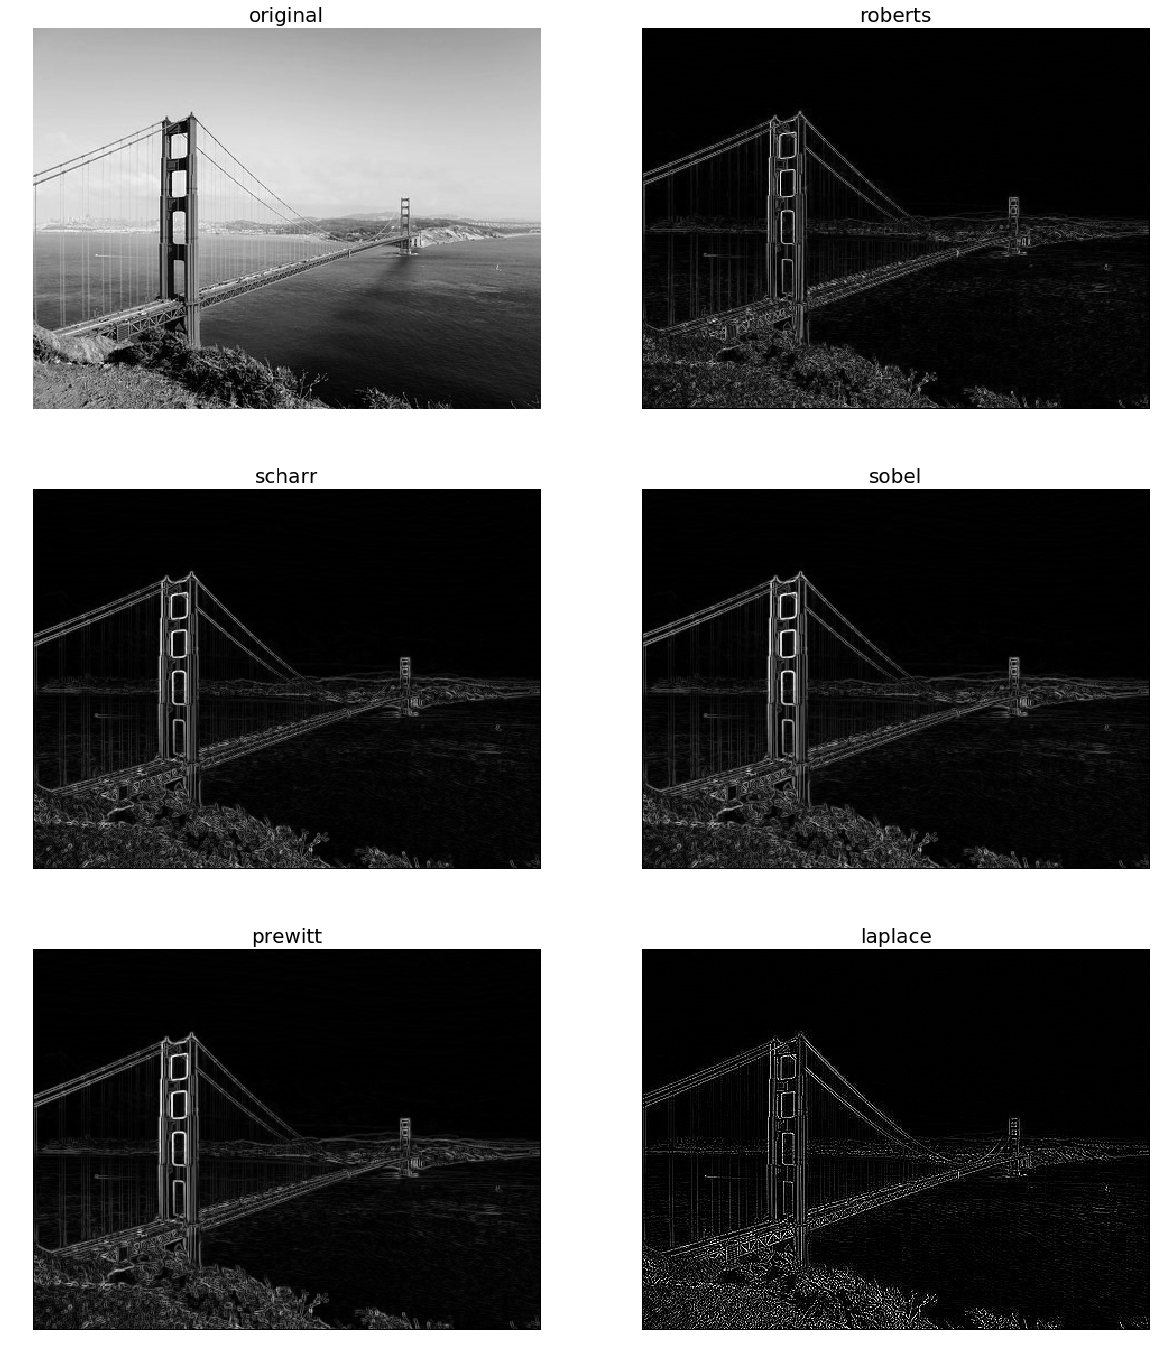

In [13]:
im = rgb2gray(imread('../images/goldengate.jpg'))			# RGB 영상--> 명암도 영상
edges = []
edges.append(im)
edges.append(filters.roberts(im)) 							# 로버츠 에지
edges.append(filters.scharr(im)) 							# 스칼 에지
edges.append(filters.sobel(im)) 							# 소벨 에지
edges.append(filters.prewitt(im)) 							# 프리윗 에지
edges.append(np.clip(filters.laplace(im), 0, 1)) 			# 라플라시안

titles = ['original', 'roberts', 'scharr', 'sobel', 'prewitt', 'laplace']
pylab.figure(figsize=(20,24)), pylab.gray()
for i, edge in enumerate(edges) :
    pylab.subplot(3, 2, i+1), plot_image(edge, titles[i])
pylab.show()

In [ ]:
캐니 에지 검출기 - scikit-image 구현

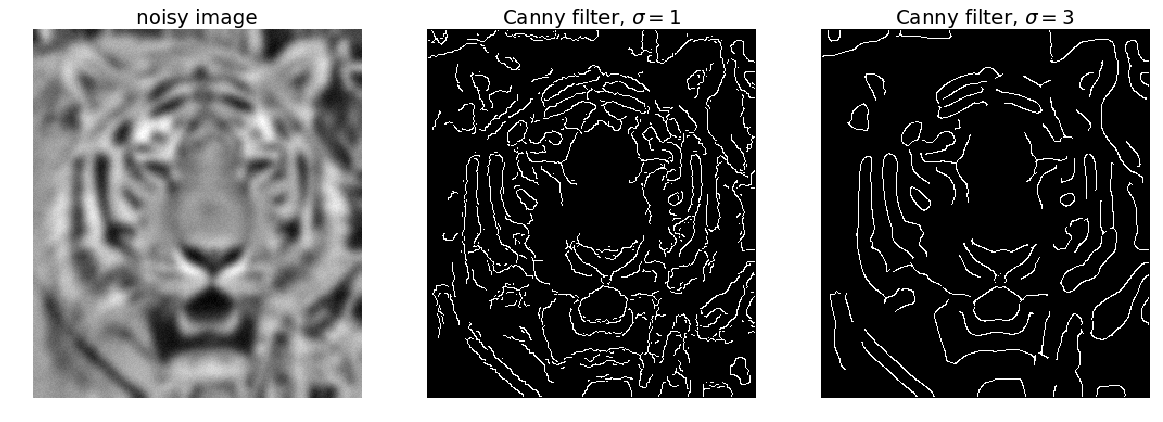

In [6]:
im = rgb2gray(imread('../images/tiger3.jpg'))
im = ndimage.gaussian_filter(im, 4)
im += 0.05 * np.random.random(im.shape)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

pylab.figure(figsize=(20,18))
pylab.subplot(1,3,1), plot_image(im, 'noisy image')
pylab.subplot(1,3,2), plot_image(edges1, 'Canny filter, $\sigma=1$')
pylab.subplot(1,3,3), plot_image(edges2, 'Canny filter, $\sigma=3$')
pylab.show()